# Project 3 - Problem 01

In [2]:
"""
Visualization code to display found State Values and the optimum policy on the maze. 
"""
# First, import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random


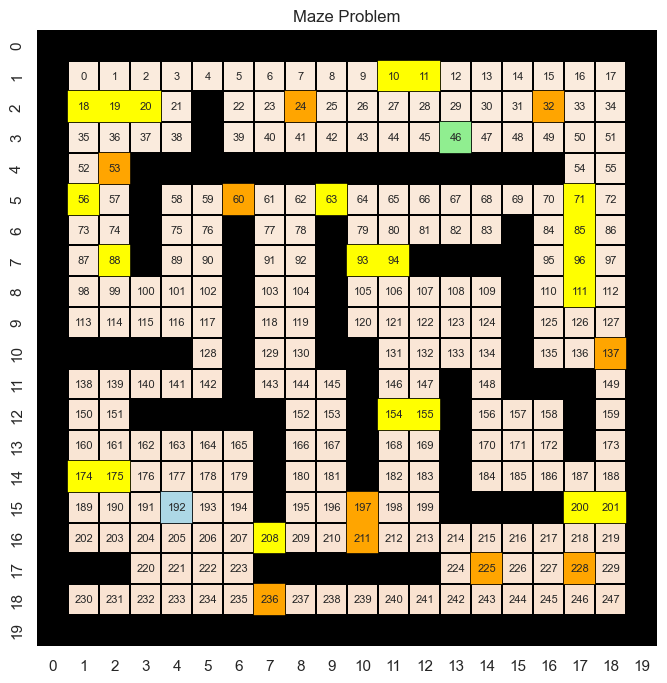

In [3]:
num_states = 248
num_actions = 4

startState = 192
terminalState = 46

s_loc = np.zeros((num_states,2))

# Initialize the reward function
r = np.zeros((num_actions,num_states, num_states))

# Initialize the transition probability function
p = np.zeros((num_actions,num_states, num_states))

""" 
Define and Visualize State Matrix 
See https://seaborn.pydata.org/generated/seaborn.heatmap.html for more info on arguments
"""
maze = \
    np.array([
        ['W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W'],
        ['W','S','S','S','S','S','S','S','S','S','S','B','B','S','S','S','S','S','S','W'],
        ['W','B','B','B','S','W','S','S','O','S','S','S','S','S','S','S','O','S','S','W'],
        ['W','S','S','S','S','W','S','S','S','S','S','S','S','G','S','S','S','S','S','W'],
        ['W','S','O','W','W','W','W','W','W','W','W','W','W','W','W','W','W','S','S','W'],
        ['W','B','S','W','S','S','O','S','S','B','S','S','S','S','S','S','S','B','S','W'],
        ['W','S','S','W','S','S','W','S','S','W','S','S','S','S','S','W','S','B','S','W'],
        ['W','S','B','W','S','S','W','S','S','W','B','B','W','W','W','W','S','B','S','W'],
        ['W','S','S','S','S','S','W','S','S','W','S','S','S','S','S','W','S','B','S','W'],
        ['W','S','S','S','S','S','W','S','S','W','S','S','S','S','S','W','S','S','S','W'],
        ['W','W','W','W','W','S','W','S','S','W','W','S','S','S','S','W','S','S','O','W'],
        ['W','S','S','S','S','S','W','S','S','S','W','S','S','W','S','W','W','W','S','W'],
        ['W','S','S','W','W','W','W','W','S','S','W','B','B','W','S','S','S','W','S','W'],
        ['W','S','S','S','S','S','S','W','S','S','W','S','S','W','S','S','S','W','S','W'],
        ['W','B','B','S','S','S','S','W','S','S','W','S','S','W','S','S','S','S','S','W'],
        ['W','S','S','S','S','S','S','W','S','S','O','S','S','W','W','W','W','B','B','W'],
        ['W','S','S','S','S','S','S','B','S','S','O','S','S','S','S','S','S','S','S','W'],
        ['W','W','W','S','S','S','S','W','W','W','W','W','W','S','O','S','S','O','S','W'],
        ['W','S','S','S','S','S','S','O','S','S','S','S','S','S','S','S','S','S','S','W'],
        ['W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W','W']])

maze_col = len(maze[0])
maze_row = len(maze)

a_desc = ["UP", "DOWN", "LEFT", "RIGHT"]
# 0 - UP
# 1 - DOWN
# 2 - LEFT
# 3 - RIGHT



# This is a random matrix for example purposes. 
# Matrix is defined as 20x20 instead of 18x18 stated in the project description in order to treat borders as wall states
State_Matrix = \
    np.array([[np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN],
              [np.NaN,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,np.NaN],
              [np.NaN,1,1,1,0,np.NaN,0,0,5,0,0,0,0,0,0,0,5,0,0,np.NaN],
              [np.NaN,0,0,0,0,np.NaN,0,0,0,0,0,0,0,7,0,0,0,0,0,np.NaN],
              [np.NaN,0,5,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,0,np.NaN],
              [np.NaN,1,0,np.NaN,0,0,5,0,0,1,0,0,0,0,0,0,0,1,0,np.NaN],
              [np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN,0,1,0,np.NaN],
              [np.NaN,0,1,np.NaN,0,0,np.NaN,0,0,np.NaN,1,1,np.NaN,np.NaN,np.NaN,np.NaN,0,1,0,np.NaN],
              [np.NaN,0,0,0,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN,0,1,0,np.NaN],
              [np.NaN,0,0,0,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN,0,0,0,np.NaN],
              [np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,np.NaN,0,0,np.NaN,np.NaN,0,0,0,0,np.NaN,0,0,5,np.NaN],
              [np.NaN,0,0,0,0,0,np.NaN,0,0,0,np.NaN,0,0,np.NaN,0,np.NaN,np.NaN,np.NaN,0,np.NaN],
              [np.NaN,0,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,0,np.NaN,1,1,np.NaN,0,0,0,np.NaN,0,np.NaN],
              [np.NaN,0,0,0,0,0,0,np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,0,np.NaN,0,np.NaN],
              [np.NaN,1,1,0,0,0,0,np.NaN,0,0,np.NaN,0,0,np.NaN,0,0,0,0,0,np.NaN],
              [np.NaN,0,0,0,3,0,0,np.NaN,0,0,5,0,0,np.NaN,np.NaN,np.NaN,np.NaN,1,1,np.NaN],
              [np.NaN,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,np.NaN],
              [np.NaN,np.NaN,np.NaN,0,0,0,0,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,0,5,0,0,5,0,np.NaN],
              [np.NaN,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,np.NaN],
              [np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN,np.NaN]])
        
# Get the reward for the next state (s_prime)
def getReward(s_prime):
    reward = 0
    
    # The location of the current state in the maze
    i = s_loc[s_prime,0]
    j = s_loc[s_prime,1]
    
    if(maze[i][j] == 'B'):
        reward += -10
    if(maze[i][j] == 'O'):
        reward += -5
    elif(maze[i][j] == 'G'):
        reward += 200
    
    reward += -1
    
    return  reward

# Map between the state and the location in the maze
def mapStateToMaze():
    s = 0
    for i in range(maze_row):
        for j in range(maze_col):
            if(maze[i][j] == 'S' or maze[i][j] == 'B' or maze[i][j] == 'O' or maze[i][j] == 'G'):
                s_loc[s] = [i,j]
                s += 1
    
    return s_loc

s_loc = mapStateToMaze().astype(int)

# print("The state location in the maze are: ")
# print(s_loc)

# Get state from the location in the maze
def getStateFromMaze(i,j):
    k = np.where((s_loc == (i,j)).all(axis=1))
    if(k[0].size == 0):
        return 0
    else:
        return k[0][0]
            
# Get the next state given the current state and the action
def getNextState(s, a):
    s_prime = 0
    
    # The location of the current state in the maze
    i = s_loc[s,0]
    j = s_loc[s,1]
    
    if(a == 0):
        # Action is UP
        if(maze[i-1][j] != 'W'):
            s_prime = getStateFromMaze(i-1,j)
        else:
            s_prime = s
    elif(a == 1):
        # Action is DOWN
        if(maze[i+1][j] != 'W'):
            s_prime = getStateFromMaze(i+1,j)
        else:
            s_prime = s
    elif(a == 2):
        # Action is LEFT
        if(maze[i][j-1] != 'W'):
            s_prime = getStateFromMaze(i,j-1)
        else:
            s_prime = s
    elif(a == 3):
        # Action is RIGHT
        if(maze[i][j+1] != 'W'):
            s_prime = getStateFromMaze(i,j+1)
        else:
            s_prime = s
    
    # # Insert the reward of the going from s to s_prime by taking action a
    # r[a][s][s_prime] = getReward(s_prime)
    
    return s_prime


# Calculate the probability of the other states given the current state and action
def getOtherState(s,a):
    for i in range(num_actions):
        if(i != a):
            s_prime = getNextState(s,i)
            p[a][s][s_prime] += prob/3


# Create the probability transition matrix
def createTransitionMatrix(prob):
    for a in range(num_actions):
        for s in range(num_states):
            for s_prime in range(num_states):
                if(s_prime == getNextState(s,a) and s_prime != s):
                    p[a][s][s_prime] = 1-prob
                    getOtherState(s,a)
                elif(getNextState(s,a) == s):
                    p[a][s][s] = 1-prob

# Get the adjacent states of the current state
getAdjacentStates = lambda s: [getNextState(s,0), getNextState(s,1), getNextState(s,2), getNextState(s,3)]

# Get the reward matrix for a state
rewardMatrix = lambda s: [getReward(s_prime) for s_prime in getAdjacentStates(s)]

# Create the reward matrix for all states and actions
def createRewardMatrix():
    for a in range(num_actions):
        for s in range(num_states):
            adjStates = getAdjacentStates(s)
            for s_prime in adjStates:
                r[a][s][s_prime] = rewardMatrix(s)[a]


# Function to color the oil, bump, start, and end blocks
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='orange', edgecolor='orange', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='yellow', edgecolor='yellow', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))



oil_states = [(4,2),(2,8),(2,16),(5,6),(10,18),(18,7),(15,10),(16,10),(17,14),(17,17)]
bump_states = [(2,1),(2,2),(2,3),(14,1),(14,2),(5,1),(7,2),(16,7),(5,9),(1,11),(1,12),(7,10),(7,11),(12,11),(12,12),(15,18),(15,17),(5,17),(6,17),(7,17),(8,17)]
start_state = (15,4)
end_state = (3,13)

def updateStateMatrix(data):
    sns.set_theme(style='white', font_scale=1)

    for s in range(num_states):
        
        # The location of the current state in the maze
        i = s_loc[s,0]
        j = s_loc[s,1]
        
        State_Matrix[i][j] = s
    
    plt.subplots(figsize=(8,8))
    heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot=State_Matrix, annot_kws={'size': 8}, cbar= False, cmap= 'rocket_r',vmax=9999,vmin=0)
    heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
    coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
    plt.title('Maze Problem')
    plt.show()



def drawBackground(title):
    plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(State_Matrix, fmt='.0f', linewidths=0.2, linecolor='black', annot_kws={'size': 10, 'color': 'black'}, cbar= False, cmap= 'rocket_r',vmax=99999,vmin=0)
    heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
    coloring_blocks(heatmap, oil_states, bump_states, start_state,end_state)
    sns.set_theme(style='white', font_scale=1)
    plt.title(title)
    
def drawOptimalPolicy(optimal_policy, title):

    drawBackground(title)
    sns.set_theme(style='white', font_scale=1)


    # Generate The Optimal Policy
    for s in range(num_states):
            
        # The location of the current state in the maze
        i = s_loc[s,0]
        j = s_loc[s,1]
        
        # State_Matrix[i][j] = np.max(q[s])
    
    # Plot the route from the start state to the end state.
    for s in range(num_states):
        # The location of the current state in the maze
        i = s_loc[s,0]
        j = s_loc[s,1]

        if(optimal_policy[s]==0):
            plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
        if(optimal_policy[s]==1):
            plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')
        if(optimal_policy[s]==2):
            plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')
        if(optimal_policy[s]==3):
            plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')
    
    plt.show()


def drawOptimalPath(startState, terminalState, title, optimal_policy):
    
    drawBackground(title)
    sns.set_theme(style='white', font_scale=1)


    s = startState

    isGoalState = False
    while isGoalState!=True:
        
        # Get the next state based on the optimal policy
        s_prime = getNextState(s,optimal_policy[s])
        
        # The location of the current state in the maze
        i = s_loc[s,0]
        j = s_loc[s,1]

        if(optimal_policy[s]==0):
            plt.arrow(j + 0.5, i + 0.5, 0, -0.8, width=0.04, color='blue')  # Up
        if(optimal_policy[s]==1):
            plt.arrow(j + 0.5, i + 0.5, 0, 0.8, width=0.04, color='blue')    # Down
        if(optimal_policy[s]==2):
            plt.arrow(j + 0.5, i + 0.5, -0.8, 0, width=0.04, color='blue')  # Left
        if(optimal_policy[s]==3):
            plt.arrow(j + 0.5, i + 0.5, 0.8, 0, width=0.04, color='blue')   # Right
        
        # Check if the state is the goal state
        if(s_prime == terminalState):
            isGoalState = True
        else:
            s = s_prime

    # plt.show()

def generate_optimal_policy(Q_table):
    policy = np.zeros((num_states), dtype=int)

    for state in range(num_states):
        policy[state] = np.argmax(Q_table[state])
    return policy

def drawAverageAccumulativeReward(avg_reward, title):
    fig = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=avg_reward, color='purple').set(title=title, xlabel='Episodes', ylabel='Average Accumulative Reward')
    sns.set_theme(style='darkgrid', font_scale=1)
    # plt.legend(['$\epsilon$ = 0.0', '$\epsilon$ = 0.1', '$\epsilon$ = 0.2', '$\epsilon$ = 0.5'], loc ="lower right")
    # plt.show()

updateStateMatrix(s_loc)

In [4]:
prob = 0.02
gamma = 0.95
alpha = 0.3
epsilon = 0.1

num_episodes = 1000
num_steps = 1000
num_run = 10

createRewardMatrix()

## Q-Learning

$p=0.02$, $\gamma=0.95$, $\alpha=0.3$, $\epsilon=0.1$

In [172]:
# Method to get the action based on epsilon greedy policy
def getAction(s,q):
    if(np.random.random() < epsilon):
        return np.random.randint(0,num_actions-1)
    else:
        return np.argmax(q[s])

def qlearning(runs, episodes, steps, gamma):
    q = np.zeros((num_states,num_actions))

    total_reward = np.zeros((runs,episodes))
    avg_reward = np.zeros((episodes))

    # Q Learning Algorithm
    for n in range(runs):
        # Initialize Q table    
        q = np.zeros((num_states,num_actions))

        for e in range(episodes):
        # Select random state
            s = random.randint(0,num_states-1)

            step = 0
            episode_reward = 0

            for step in range(steps):
                # Select action based on epsilon greedy policy
                a = getAction(s,q)

                # Get the next state using the selected action
                s_prime = getNextState(s,a)

                # Update the Q table
                q[s][a] = q[s][a] + alpha*(r[a][s][s_prime] + (gamma*np.max(q[s_prime])) - q[s][a])
                episode_reward += r[a][s][s_prime]
            
                s = s_prime

                if(s == terminalState):
                    break

                # print(f'Episode: {e} Start: {begin} Step: {step} Reward: {episode_reward/step}')
            total_reward[n][e] = episode_reward
    
    avg_reward = total_reward.mean(axis=0)

    optimal_policy = generate_optimal_policy(q)

    return q,avg_reward, optimal_policy

q_qlearning, avg_reward_qlearning, optimal_policy = qlearning(num_run, num_episodes, num_steps, gamma)
    





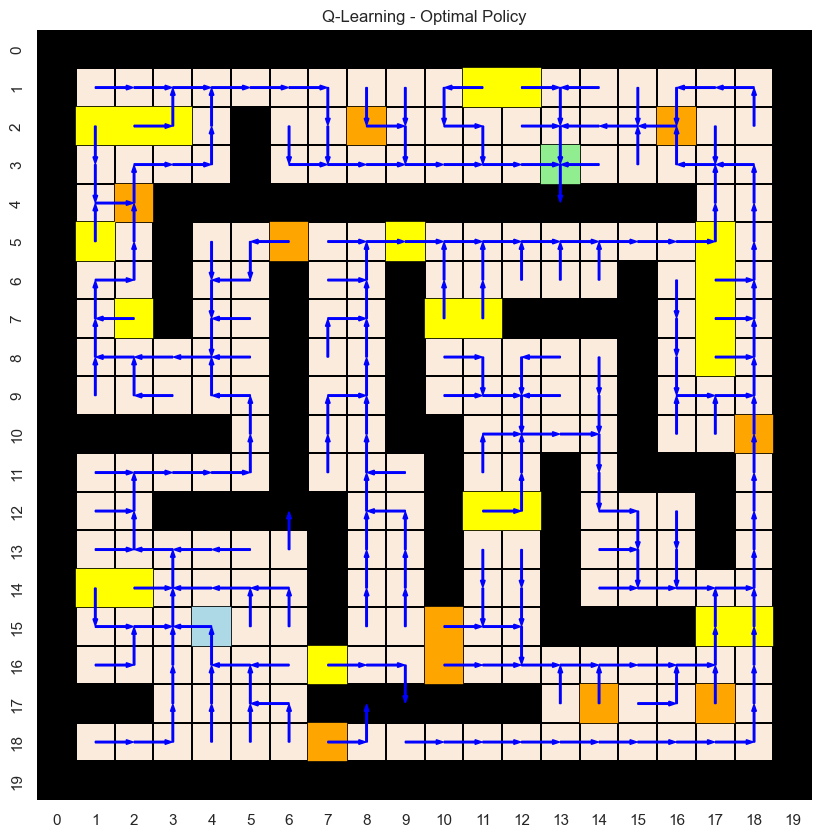

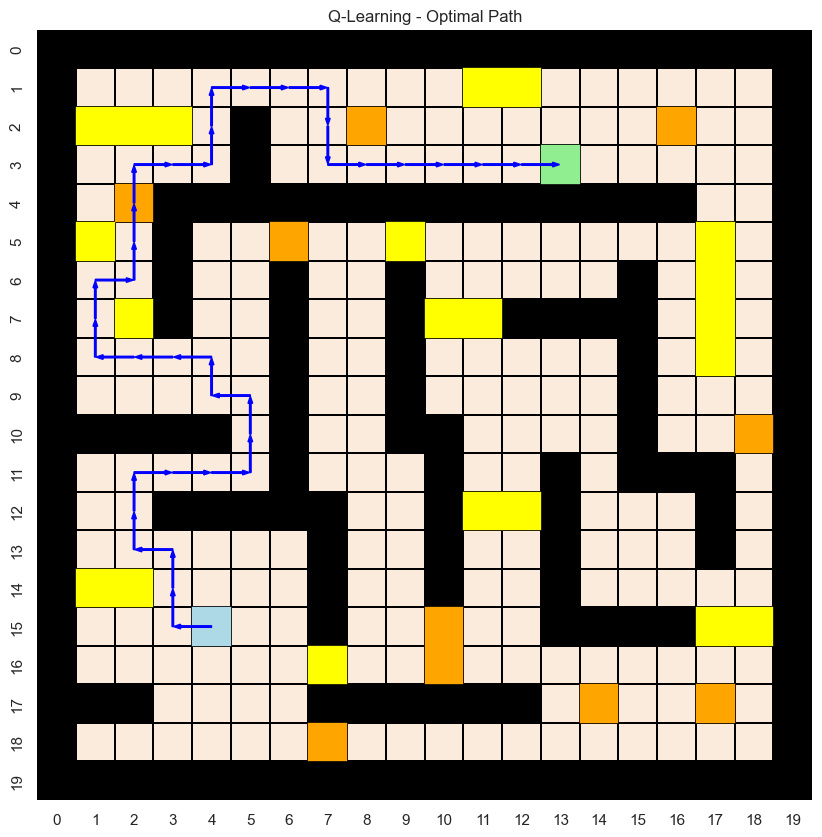

In [6]:



drawOptimalPolicy(optimal_policy, 'Q-Learning - Optimal Policy')

drawOptimalPath(startState, terminalState, 'Q-Learning - Optimal Path', optimal_policy)



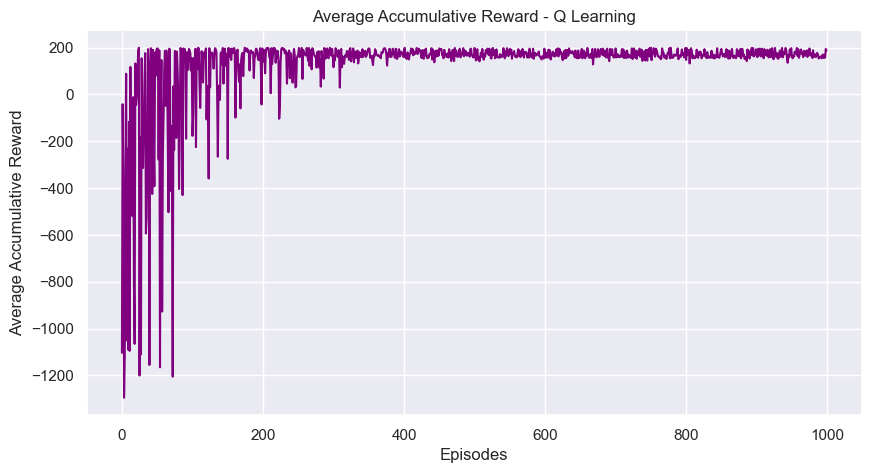

In [173]:
drawAverageAccumulativeReward(avg_reward_qlearning,'Average Accumulative Reward - Q Learning')


## SARSA

In [174]:
def SARSA(runs, episodes, steps, alpha, gamma):
    q = np.zeros((num_states,num_actions))

    total_reward = np.zeros((runs,episodes))
    avg_reward = np.zeros((episodes))
        
    for n in range(runs):
        # Initialize Q table    
        q = np.zeros((num_states,num_actions))
        
        # SARSA Learning Algorithm
        for e in range(episodes):
            # Select random state
            s = random.randint(0,num_states-1)

            step = 0
            episode_reward = 0

            # Select action based on epsilon greedy policy
            a = getAction(s,q)
            
            for step in range(steps):
                s_prime = getNextState(s,a)

                # Select action based on epsilon greedy policy
                a_prime = getAction(s_prime,q)

                q[s][a] = q[s][a] + alpha*(r[a][s][s_prime] + (gamma*q[s_prime][a_prime]) - q[s][a])
                episode_reward += r[a][s][s_prime]
                
                s = s_prime
                a = a_prime

                if(s == terminalState):
                    break
            
            total_reward[n][e] = episode_reward

    avg_reward = total_reward.mean(axis=0)

    optimal_policy = generate_optimal_policy(q)

    return q, avg_reward, optimal_policy



In [175]:
q_sarsa, avg_reward_sarsa, optimal_policy = SARSA(runs=num_run, episodes=num_episodes, steps=num_steps, alpha=alpha, gamma=gamma)



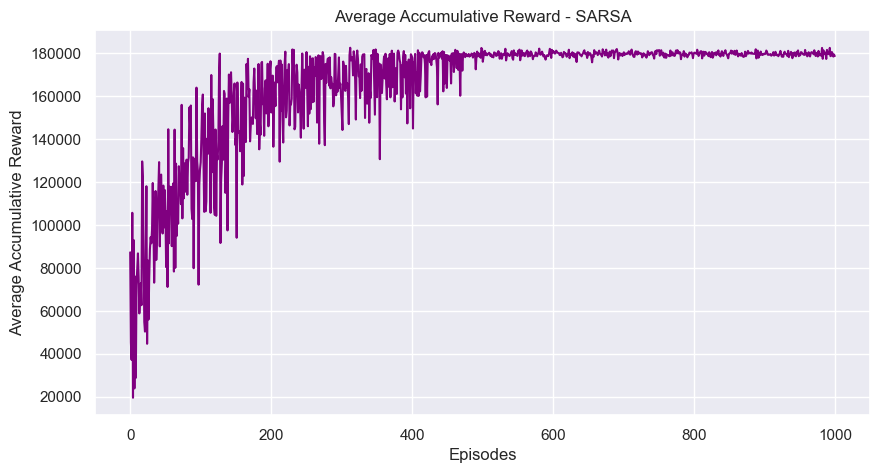

In [11]:
drawAverageAccumulativeReward(avg_reward_sarsa,'Average Accumulative Reward - SARSA')

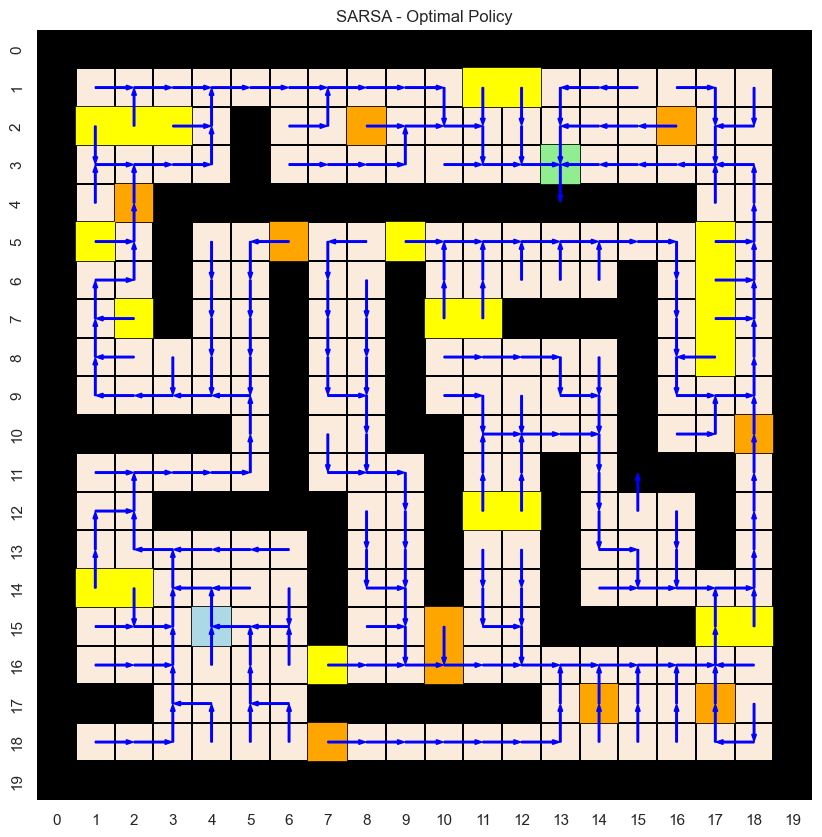

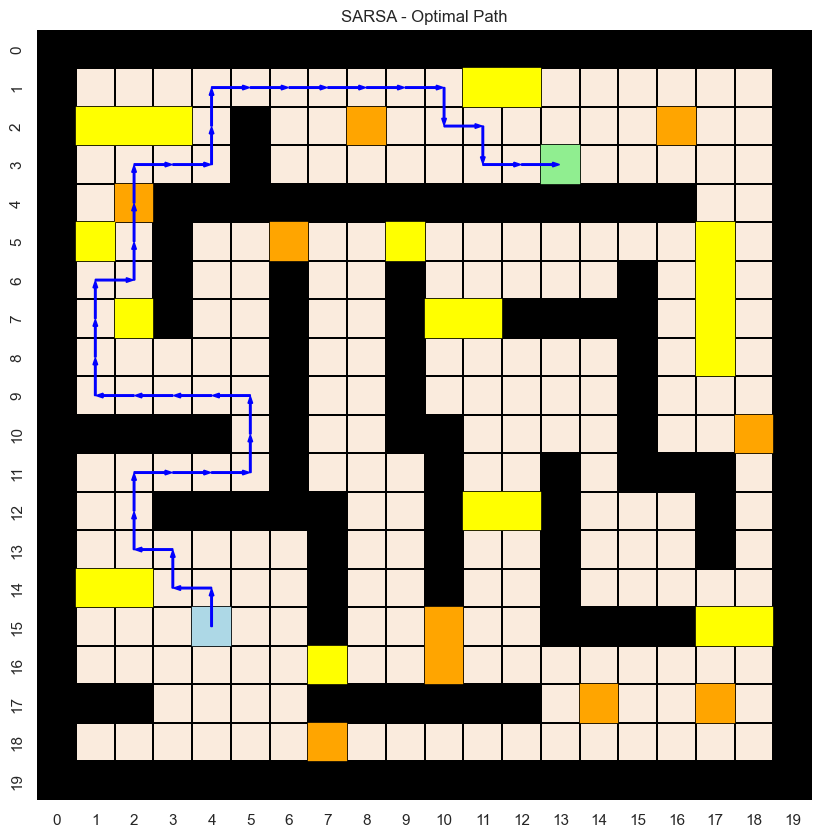

In [12]:
sns.set_theme(style='white', font_scale=1)
drawOptimalPolicy(optimal_policy, 'SARSA - Optimal Policy')

drawOptimalPath(startState, terminalState, 'SARSA - Optimal Path', optimal_policy)    

## Actor-Critic

### Using Given Parameters

In [177]:
h = np.zeros((num_states,num_actions))
v = np.zeros((num_states,num_actions))
pi = np.zeros((num_states, num_actions))

gamma = 0.95

beta = 0.05

# Method to get the action based on softmax policy
def getActionSoftmax(h,s):
    for a in range(num_actions):
        pi_actor = np.exp(h[s])
        pi_actor = pi_actor/np.sum(pi_actor)
        # pi[s][a] = num / den

    # print(f'State: {h[s]}')
    # print(f'Pi: {pi[s]}')

    # pi[s] = np.nan_to_num(pi[s], nan=1.0, posinf=0.0, neginf=0.0)

    action = np.random.choice(num_actions, p=pi_actor)

    return action, pi_actor[action]

# Actor-Critic Learning Algorithm
def actor_critic(runs, episodes, steps, alpha, gamma, beta):
    optimal_policy = np.zeros((num_states), dtype=int)    
    
    total_reward = np.zeros((runs,episodes))
    avg_reward = np.zeros((episodes))
    
    for n in range(runs):
        # Initializations    
        h0 = np.zeros((num_states,num_actions))
        h1 = np.zeros((num_states,num_actions))
        v = np.zeros((num_states,num_actions))

        total_reward = np.zeros((runs,episodes))
        avg_reward = np.zeros((episodes))

        for e in range(episodes):
            # Select random state
            s = random.randint(0,num_states-1)

            h0 = np.copy(h1)
            h1 = np.zeros((num_states,num_actions))

            init_s = s

            step = 0
            episode_reward = 0
            while step < steps:
                # Select action based on softmax policy
                a, pi2 = getActionSoftmax(h,s)

                # Get the next state using the selected action a and noise
                s_prime = getNextState(s,a)

                # Calculate TD Error
                delta = r[a][s][s_prime] + (gamma*v[s_prime][a]) - v[s][a]
                episode_reward += r[a][s][s_prime]

                v[s][a] = v[s][a] + (alpha*delta)

                h1[s][a] = h0[s][a] + (beta*delta*(1-pi2))

                # print(f'States: {s} Action: {a}')
                # print(f'V(s): {v[s]} H(s): {h[s]}\n')

                s = s_prime

                if s == terminalState:
                    break

                # if init_s == startState and s_prime == terminalState:
                    # print(f'{init_s} -> {s_prime}')
                    # optimal_policy = generate_optimal_policy(v)
                    # drawOptimalPolicy(optimal_policy, 'Actor-Critic - Optimal Policy')
                    # break
                # else:
                step += 1
            
            total_reward[n][e]   = episode_reward
        
        # optimal_policy = []
        # for i in range(num_states):
        #     optimal_policy[i] = np.argmax(pi[i])
        
        print(f'Run: {n+1}')

    avg_reward = np.mean(total_reward, axis=0)

    optimal_policy = generate_optimal_policy(v)


    return v, avg_reward, optimal_policy


# drawOptimalPath(startState, terminalState, 'Maze Problem - Optimal Path From Start to Terminal', optimal_policy)


In [19]:
print('Actor-Critic Learning Algorithm')

Actor-Critic Learning Algorithm


In [178]:
v_actor_critic, avg_reward_actor_critic, optimal_policy = actor_critic(runs=num_run, episodes=num_episodes, steps=num_steps, alpha=alpha, gamma=gamma, beta=beta)

drawAverageAccumulativeReward(avg_reward_actor_critic,'Average Accumulative Reward - Actor-Critic')

KeyboardInterrupt: 

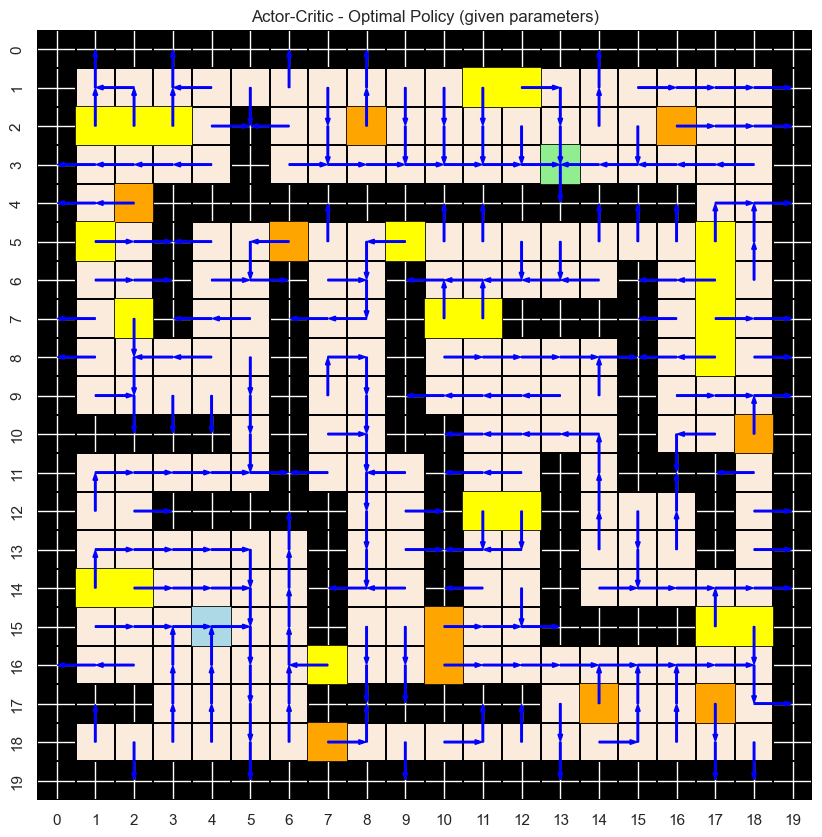

In [133]:
drawOptimalPolicy(optimal_policy, 'Actor-Critic - Optimal Policy (given parameters)')

### Using Tuned Parameters

Run: 1


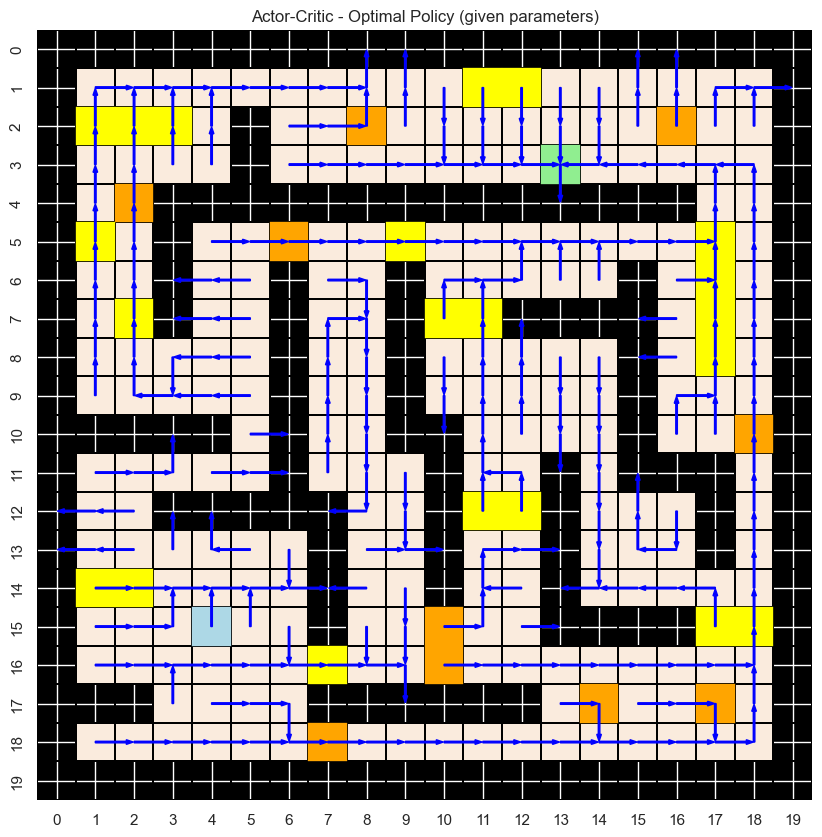

[3 3 3 3 3 3 3 0 0 1 1 1 1 1 0 0 3 3 0 0 0 0 3 3 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 1 2 2 2 2 2 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 2 2 3 1 3 3 0 0 0 3 0 0 0 0 2 2 3 1 0 0 2 0 0 0 0 1 2 2 0 1 1 0 0 1 1 2
 0 0 0 0 2 2 2 0 1 1 0 0 1 1 3 0 0 3 0 1 0 0 1 1 0 0 0 3 3 0 3 3 0 1 1 0 2
 1 0 2 2 2 1 0 0 1 0 1 0 2 2 0 0 2 1 3 3 3 3 1 0 2 0 3 3 3 3 3 3 2 1 0 2 2
 2 2 2 0 3 3 0 0 0 1 1 1 3 0 3 0 0 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 0 0 3
 3 1 3 1 3 3 1 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0]


In [179]:
h = np.zeros((num_states,num_actions))
v = np.zeros((num_states,num_actions))
pi = np.zeros((num_states, num_actions))

prob = 0.02
gamma = 0.9999
alpha = 0.4 # Learning rate for the Q-learning 0.3 --> 0.1
epsilon = 0.01 # ! not used in the actor-critic algorithm
beta = 0.3 # Learning rate for the critic 0.05 --> 0.05

num_episodes = 1000
num_steps = 1000
num_run = 1

createRewardMatrix()

v_actor_critic, avg_reward_actor_critic, optimal_policy = actor_critic(runs=num_run, episodes=num_episodes, steps=num_steps, alpha=alpha, gamma=gamma, beta=beta)

drawOptimalPolicy(optimal_policy, 'Actor-Critic - Optimal Policy (given parameters)')

print(optimal_policy)


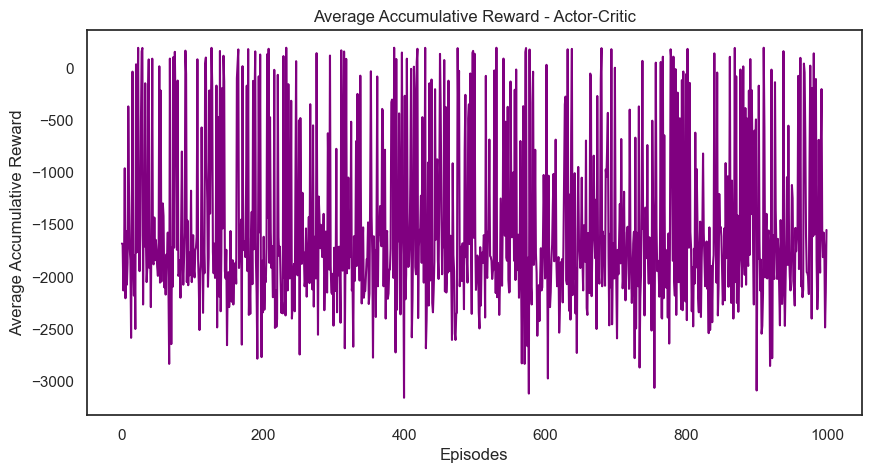

In [180]:
drawAverageAccumulativeReward(avg_reward_actor_critic,'Average Accumulative Reward - Actor-Critic')

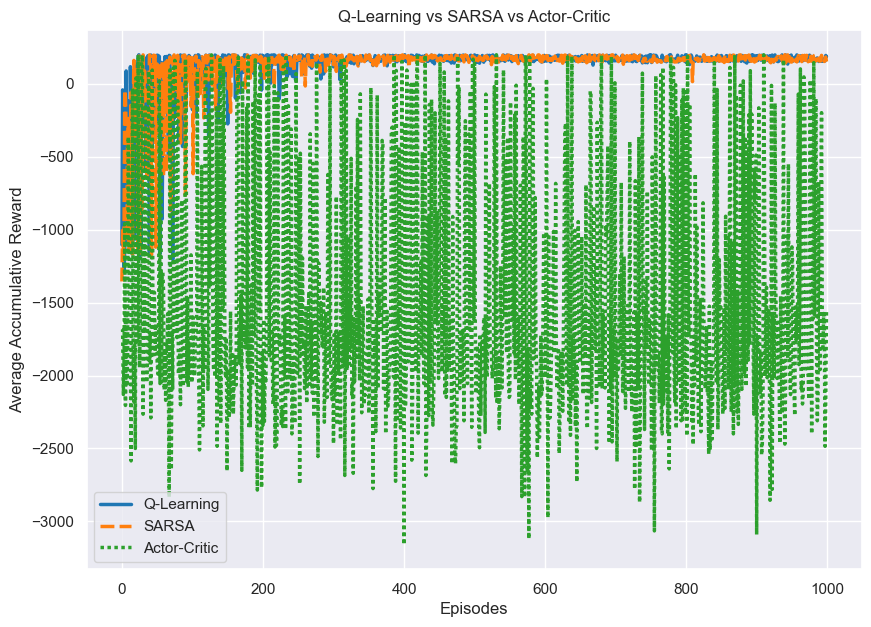

In [181]:
import pandas as pd

data_preproc = pd.DataFrame({
    'Q-Learning': avg_reward_qlearning,
    'SARSA': avg_reward_sarsa,
    'Actor-Critic': avg_reward_actor_critic})
    

fig = plt.subplots(figsize=(10, 7))
# sns.lineplot(data=avg_reward_qlearning, color='purple', alpha=0.8)
# sns.lineplot(data=avg_reward_sarsa, color='orange', alpha=0.8)
# sns.lineplot(data=[avg_reward_qlearning,avg_reward_sarsa,avg_reward_actor_critic]).set(title='Q-Learning vs SARSA vs Actor-Critic', xlabel='Episodes', ylabel='Average Accumulative Reward')
sns.lineplot(data=data_preproc, palette='tab10', linewidth=2.5).set(title='Q-Learning vs SARSA vs Actor-Critic', xlabel='Episodes', ylabel='Average Accumulative Reward')
# plt.legend(['Actor-Critic', 'Q-Learning', 'SARSA'], loc ="lower right")
plt.show()

## SARSA ( $ \lambda $ )

In [ ]:
def SARSA_LAMBDA(runs, episodes, steps, alpha, gamma, lamda):
    q = np.zeros((num_states,num_actions))
    E = np.zeros((num_states,num_actions))

    total_reward = np.zeros((runs,episodes))
    avg_reward = np.zeros((episodes))
        
    for n in range(runs):
        # Initialize Q table    
        q = np.zeros((num_states,num_actions))
        
        # SARSA Learning Algorithm
        for e in range(episodes):
            E = np.zeros((num_states,num_actions))

            # Select random state
            s = random.randint(0,num_states-1)

            step = 0
            episode_reward = 0

            # Select action based on epsilon greedy policy
            a = getAction(s,q)
            
            while step < steps:
                s_prime = getNextState(s,a)

                # Select action based on epsilon greedy policy
                a_prime = getAction(s_prime,q)

                delta = r[a][s][s_prime] + (gamma*q[s_prime][a_prime]) - q[s][a]

                E[s][a] = E[s][a] + 1

                for i in range(num_states):
                    for j in range(num_actions):
                        q[i][j] = q[i][j] + (alpha*delta*E[i][j])
                        E[i][j] = gamma*lamda*E[i][j]

                episode_reward += r[a][s][s_prime]
                
                print(f'State: {s} Action: {a} Reward: {r[a][s][s_prime]} Next State: {s_prime} Next Action: {a_prime} Q: {q[s][a]}')
                s = s_prime
                a = a_prime

                if s == getStateFromMaze(3,13):
                    break
                else:
                    step += 1
            
            total_reward[n][e] = episode_reward

    avg_reward = total_reward.mean(axis=0)

    optimal_policy = generate_optimal_policy(q)

    return q, avg_reward, optimal_policy

q_sarsa_lambda, avg_reward_sarsa_lambda, optimal_policy = SARSA_LAMBDA(runs=10, episodes=num_episodes, steps=num_steps, alpha=alpha, gamma=gamma, lamda=0.95)

State: 6 Action: 0 Reward: -1.0 Next State: 6 Next Action: 0 Q: -0.3
State: 6 Action: 0 Reward: -1.0 Next State: 6 Next Action: 1 Q: -0.699525
State: 6 Action: 1 Reward: -1.0 Next State: 23 Next Action: 0 Q: -0.3
State: 23 Action: 0 Reward: -1.0 Next State: 6 Next Action: 2 Q: -0.3
State: 6 Action: 2 Reward: -1.0 Next State: 5 Next Action: 0 Q: -0.3
State: 5 Action: 0 Reward: -1.0 Next State: 5 Next Action: 0 Q: -0.3
State: 5 Action: 0 Reward: -1.0 Next State: 5 Next Action: 1 Q: -0.699525
State: 5 Action: 1 Reward: -1.0 Next State: 22 Next Action: 0 Q: -0.3
State: 22 Action: 0 Reward: -1.0 Next State: 5 Next Action: 2 Q: -0.3
State: 5 Action: 2 Reward: -1.0 Next State: 4 Next Action: 0 Q: -0.3
State: 4 Action: 0 Reward: -1.0 Next State: 4 Next Action: 0 Q: -0.3
State: 4 Action: 0 Reward: -1.0 Next State: 4 Next Action: 1 Q: -0.699525
State: 4 Action: 1 Reward: -1.0 Next State: 4 Next Action: 1 Q: -0.3
State: 4 Action: 1 Reward: -1.0 Next State: 4 Next Action: 2 Q: -0.699525
State: 4 A

KeyboardInterrupt: 